In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
#lay du lieu 
path = '/.../user.csv'
df = pd.read_csv(path)
df.head(10)

,userid,age,dob_day,dob_year,dob_month,gender,status_type
0,2094382,14,19,1999,11,male,video
1,1192601,14,2,1999,11,female,photo
2,2083884,14,16,1999,11,male,video
3,1203168,14,25,1999,12,female,photo
4,1733186,14,4,1999,12,male,photo
5,1524765,14,1,1999,12,male,photo
6,1136133,13,14,2000,1,male,video
7,1680361,13,4,2000,1,female,video
8,1365174,13,1,2000,1,male,photo
9,1712567,13,2,2000,2,male,photo


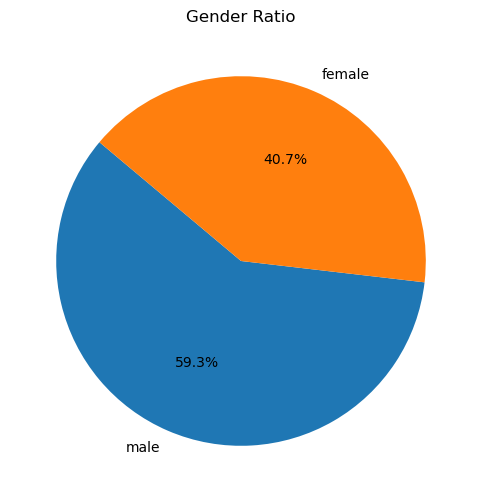

In [3]:
# Thống kê tỷ lệ nam và nữ
gender_counts = df["tên cột muốn tính tỷ lệ"].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Gender Ratio")
plt.show()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990030 entries, 0 to 990029
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   userid       990030 non-null  int64 
 1   age          990030 non-null  int64 
 2   dob_day      990030 non-null  int64 
 3   dob_year     990030 non-null  int64 
 4   dob_month    990030 non-null  int64 
 5   gender       988280 non-null  object
 6   status_type  990030 non-null  object
dtypes: int64(5), object(2)
memory usage: 52.9+ MB


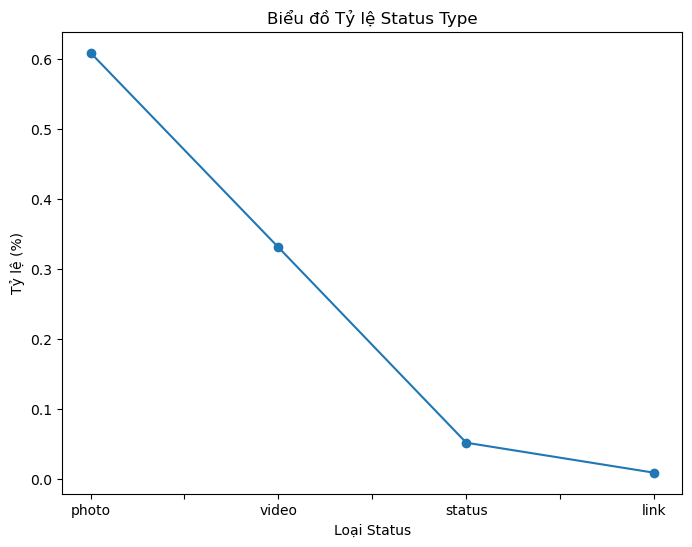

In [5]:
# Tính tỷ lệ của cột 'status_type'
status_type_counts = df['tên cột muốn tính tỷ lệ'].value_counts()
total_count = len(df)
status_type_percentage = status_type_counts / total_count

# Vẽ biểu đồ dạng line với đường độ lệch chuẩn
%matplotlib inline
plt.figure(figsize=(8, 6))
status_type_percentage.plot(kind='line', marker='o')
plt.title('Biểu đồ Tỷ lệ Status Type')
plt.xlabel('Loại Status')
plt.ylabel('Tỷ lệ (%)')
plt.show()

In [6]:
# Create an auxiliary set of column names in measured values
post_measurement_data = ['tên các cột muốn dự đoán dữ liệu']

In [8]:
df_encoded = pd.get_dummies(df, columns=['tên cột muốn mã hóa'], prefix=['tên cột muốn mã hóa'])

status_types = df['status_type'].unique()

# Tạo một đối tượng DataFrame để lưu trữ kết quả dự đoán cho từng status_type
predicted_ages = pd.DataFrame()

for status_type in status_types:
    df_filtered = df_encoded[df_encoded[f'status_{status_type}'] == 1]
    
    X = df_filtered.drop(['age', f'status_{status_type}', 'gender_female', 'gender_male'], axis=1)
    y = df_filtered['age']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    # Tạo một DataFrame tạm thời để lưu trữ kết quả dự đoán
    temp_result = pd.DataFrame({'status_type': [status_type] * len(y_test), 'age_true': y_test, 'age_predicted': y_pred})
    
    # Kết hợp kết quả dự đoán vào DataFrame tổng hợp
    predicted_ages = pd.concat([predicted_ages, temp_result])

print(predicted_ages)

mse = mean_squared_error(predicted_ages['age_true'], predicted_ages['age_predicted'])
print(f'Mean Squared Error: {mse}')


       status_type  age_true  age_predicted
209634       video        26           26.0
64664        video        16           16.0
554130       video        21           21.0
540066       video        51           51.0
469463       video        22           22.0
...            ...       ...            ...
584786      status       103          103.0
755654      status        18           18.0
332654      status        62           62.0
60269       status        14           14.0
424031      status        22           22.0

[198007 rows x 3 columns]
Mean Squared Error: 4.601691904249199e-19


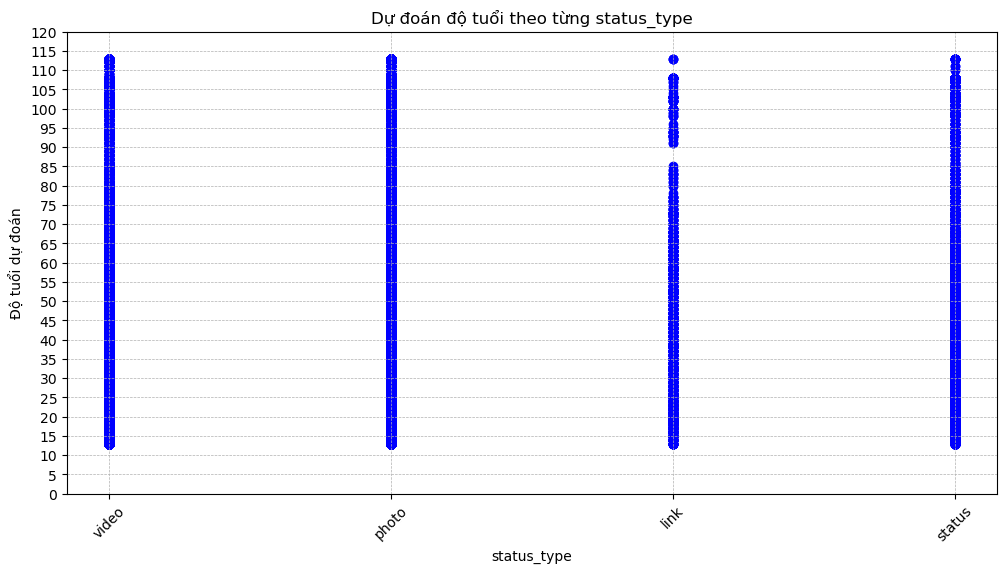

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(predicted_ages['tên cột hiện ở trục x'], predicted_ages['age_predicted'], color='blue')
plt.xlabel('status_type')
plt.ylabel('Độ tuổi dự đoán')
plt.title('Dự đoán độ tuổi theo từng status_type')
plt.xticks(rotation=45)

# Đặt khoảng cách của trục y cách nhau 5 đơn vị và bắt đầu từ 0
plt.yticks(range(0, int(max(predicted_ages['age_predicted']) + 10), 5))

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


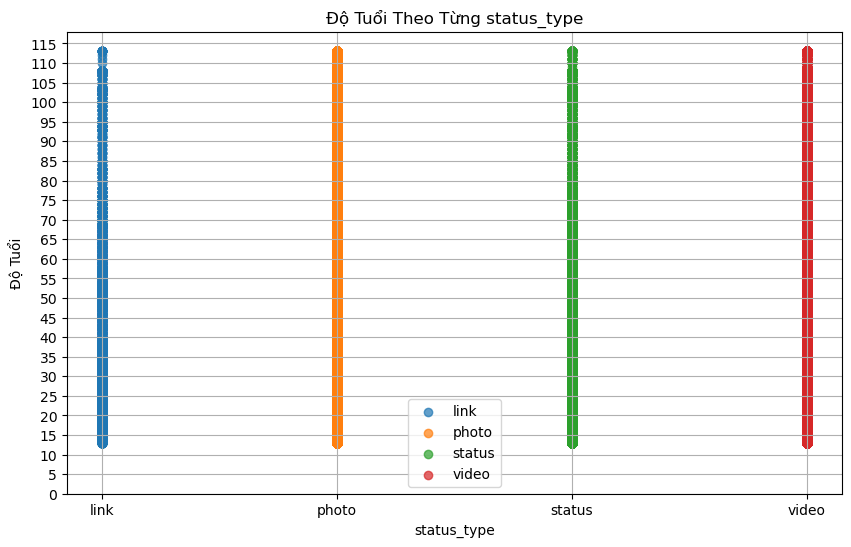

In [12]:
plt.figure(figsize=(10, 6))
for status_type, group in df.groupby('status_type'):
    plt.scatter(group['status_type'], group['age'], label=status_type, alpha=0.7)

plt.title('Độ Tuổi Theo Từng status_type')
plt.xlabel('status_type')
plt.ylabel('Độ Tuổi')
plt.legend()
plt.grid(True)

# Đặt khoảng cách giữa các giá trị trên trục y là 5 đơn vị
plt.yticks(range(0, max(df['age'])+5, 5))

plt.show()

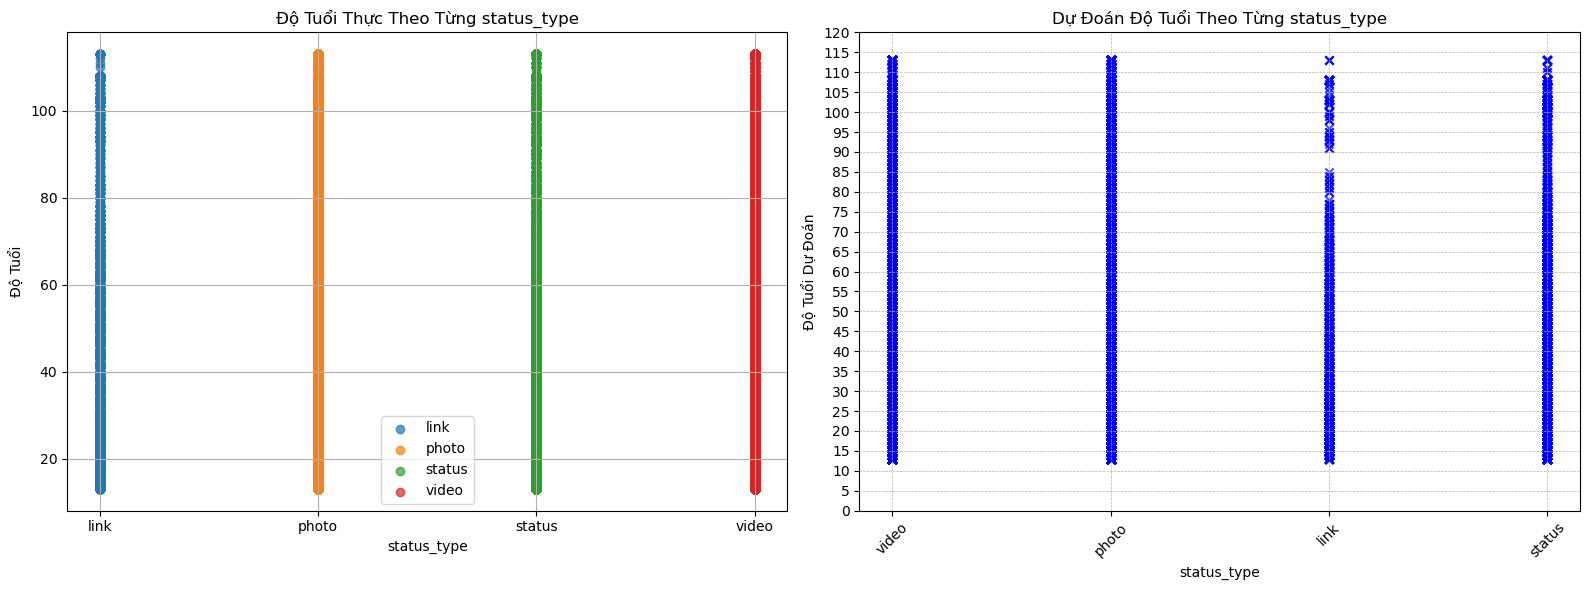

In [11]:
import matplotlib.pyplot as plt

# Tạo biểu đồ cho dữ liệu thực và dự đoán
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Biểu đồ cho dữ liệu thực
for status_type, group in df.groupby('status_type'):
    axs[0].scatter(group['status_type'], group['age'], label=status_type, alpha=0.7, marker='o')

axs[0].set_title('Độ Tuổi Thực Theo Từng status_type')
axs[0].set_xlabel('status_type')
axs[0].set_ylabel('Độ Tuổi')
axs[0].legend()
axs[0].grid(True)

# Biểu đồ cho dữ liệu dự đoán
axs[1].scatter(predicted_ages['tên cột hiện ở trục x'], predicted_ages['age_predicted'], color='blue', label='Dự đoán', alpha=0.7, marker='x')
axs[1].set_title('Dự Đoán Độ Tuổi Theo Từng status_type')
axs[1].set_xlabel('status_type')
axs[1].set_ylabel('Độ Tuổi Dự Đoán')
axs[1].xaxis.set_tick_params(rotation=45)
axs[1].set_yticks(range(0, int(max(predicted_ages['age_predicted']) + 10), 5))
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()
